## Описание практики на 2022.02.08

Глобально: Написать программу, определяющую положение всех калибровочных ступенек за сутки.

Задачи:
+ Считать данные (работаем с данными из диретории data_for_calibration). Функция чтения файла находиться в BSA3_pack.py. 
+ Те функции из файла с примером (crab_BSA.ipynb) которые используем, переносим в файл utils.py
+ Определяем положение ступенек в файлах (для каждой ступеньки отдельная картинка). Отрисовываем все ступеньки. На данном этапе можно взять любой частотный канал.

In [228]:
import BSA3_pack
import os
from utils import *
from astropy.coordinates import Angle
from astropy.time import Time
from astropy import units as u
import pandas as pd
import glob

In [174]:
24+17

41

In [219]:
path_calib = 'data_for_calibration'
files = os.listdir(path=path_calib)
files.sort()

In [4]:
# dirr = os.path.join(path_calib, '010122_00_N1_00.pnt')
# dirr
# file_list = []
# for file in files:
#     dirr = os.path.join(path_calib, file)
#     _, data = BSA3_pack.read_pnt(dirr)
#     file_list.append(data)
# file_list

In [211]:
table = pd.read_csv('beams_lpa.csv', sep=';')
table

,recorder,module,ray,N cabine,109.21,109.62,110.04,110.45,110.87,111.29
0,N0,1,1,1,48.93,55.22,55.22,55.22,55.17,55.09
1,N0,1,2,2,55.07,54.99,54.92,54.84,54.76,54.69
2,N0,1,3,3,54.67,54.59,54.51,54.44,54.36,54.29
3,N0,1,4,4,54.25,54.19,54.11,54.04,53.96,53.89
4,N0,1,5,5,53.85,53.78,53.70,53.63,53.56,53.49
...,...,...,...,...,...,...,...,...,...,...
122,N2,6,4,124,-5.68,-5.48,-5.27,-5.07,-4.88,-4.69
123,N2,6,5,125,-6.52,-6.31,-6.10,-5.90,-5.69,-5.49
124,N2,6,6,126,-7.40,-7.18,-6.95,-6.74,-6.53,-6.32
125,N2,6,7,127,-8.29,-8.07,-7.83,-7.61,-7.38,-7.17


In [212]:
dec_obj = Angle("22d00m52.10s")

In [213]:
der_ray, idx = find_nearest(table['110.04'], dec_obj.value)

In [214]:
module = table.iloc[idx]['module']
ray = table.iloc[idx]['ray']

In [215]:
module

6

In [216]:
radius = 4000
RA_crab = Angle("05:34:31.97", unit='hourangle')
DEC_crab = [22, 0, 52.1]
# months = f'{MONTHS["01"]}2022' # [f'{MONTHS["08"]}2019', f'{MONTHS["09"]}2019', f'{MONTHS["09"]}2020']
# years = '2022'

In [283]:
dirr = []
dirr1 = glob.glob('*/*_[02][159]*.pnt')
dirr2 = glob.glob('*/*_1[37]*.pnt')
dirr = dirr1 + dirr2
dirr.sort()
dirr

['data_for_calibration/010122_01_N1_00.pnt',
 'data_for_calibration/010122_05_N1_00.pnt',
 'data_for_calibration/010122_09_N1_00.pnt',
 'data_for_calibration/010122_13_N1_00.pnt',
 'data_for_calibration/010122_17_N1_00.pnt',
 'data_for_calibration/010122_21_N1_00.pnt',
 'data_for_calibration/150122_01_N1_00.pnt',
 'data_for_calibration/150122_05_N1_00.pnt',
 'data_for_calibration/150122_09_N1_00.pnt',
 'data_for_calibration/150122_13_N1_00.pnt',
 'data_for_calibration/150122_17_N1_00.pnt',
 'data_for_calibration/150122_21_N1_00.pnt',
 'data_for_calibration/310122_01_N1_00.pnt',
 'data_for_calibration/310122_05_N1_00.pnt',
 'data_for_calibration/310122_09_N1_00.pnt',
 'data_for_calibration/310122_13_N1_00.pnt',
 'data_for_calibration/310122_17_N1_00.pnt',
 'data_for_calibration/310122_21_N1_00.pnt']

In [297]:
dirs = glob.glob('data_for_calibration/*_N[12]_00.pnt')
dirs = [i for i in dirs if i[-12:-10] in ['01','05','09','13','17','21']]
dirs.sort()
print(*dirs, sep='\n')

data_for_calibration/010122_01_N1_00.pnt
data_for_calibration/010122_05_N1_00.pnt
data_for_calibration/010122_09_N1_00.pnt
data_for_calibration/010122_13_N1_00.pnt
data_for_calibration/010122_17_N1_00.pnt
data_for_calibration/010122_21_N1_00.pnt
data_for_calibration/150122_01_N1_00.pnt
data_for_calibration/150122_05_N1_00.pnt
data_for_calibration/150122_09_N1_00.pnt
data_for_calibration/150122_13_N1_00.pnt
data_for_calibration/150122_17_N1_00.pnt
data_for_calibration/150122_21_N1_00.pnt
data_for_calibration/310122_01_N1_00.pnt
data_for_calibration/310122_05_N1_00.pnt
data_for_calibration/310122_09_N1_00.pnt
data_for_calibration/310122_13_N1_00.pnt
data_for_calibration/310122_17_N1_00.pnt
data_for_calibration/310122_21_N1_00.pnt


In [296]:
'data_for_calibration/310122_21_N1_00.pnt'[-12:-10]

'21'

In [287]:
for i in range(1, 24, 4):
    print(i)

1
5
9
13
17
21


/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


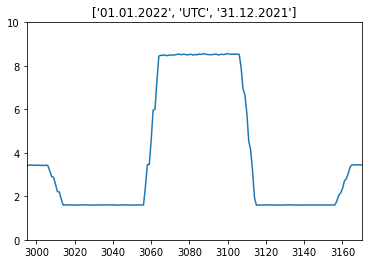

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


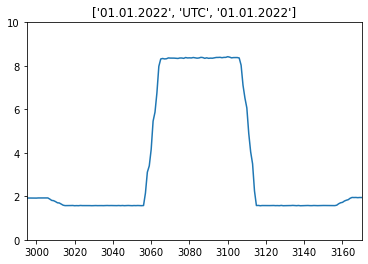

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


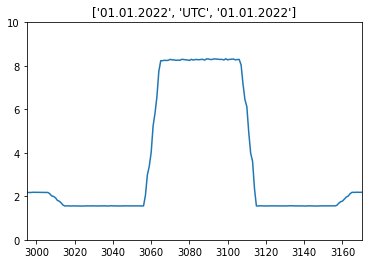

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


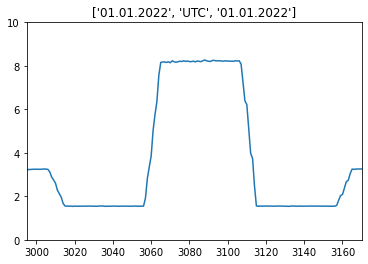

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


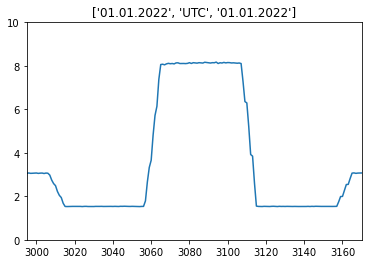

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


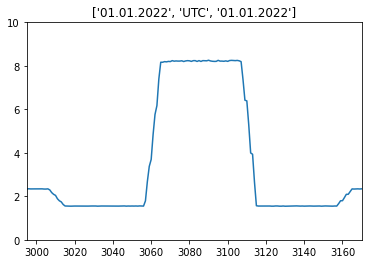

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


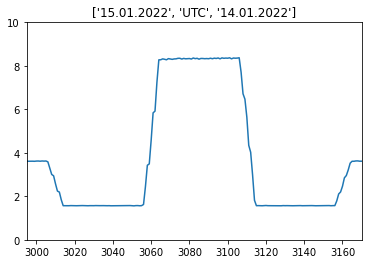

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


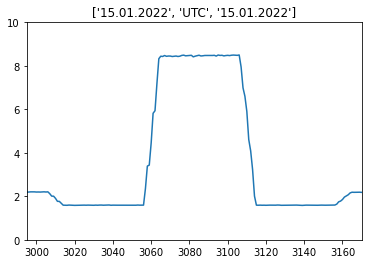

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


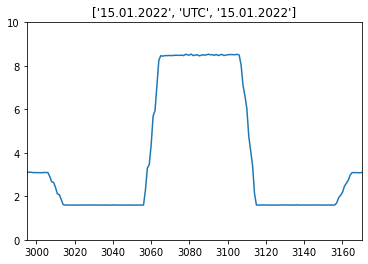

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


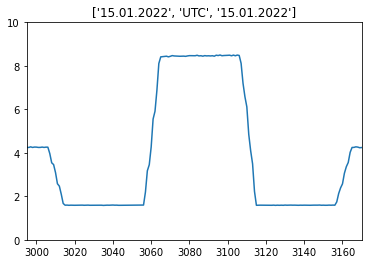

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


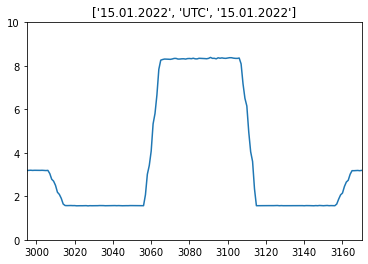

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


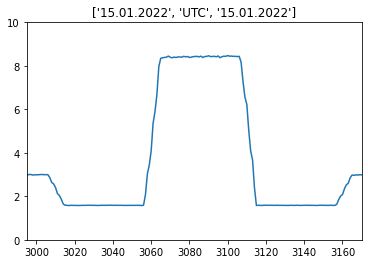

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


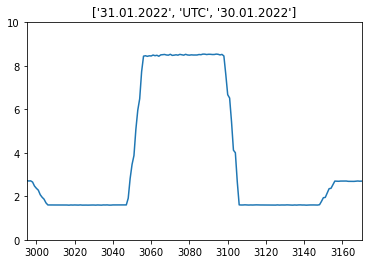

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


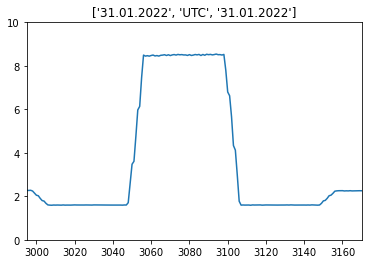

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


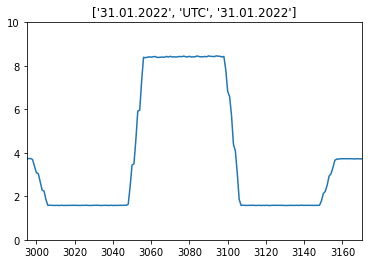

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


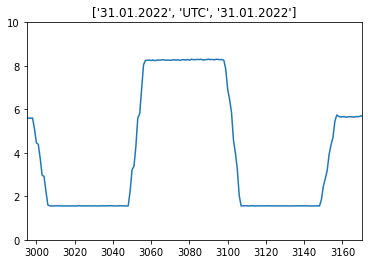

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


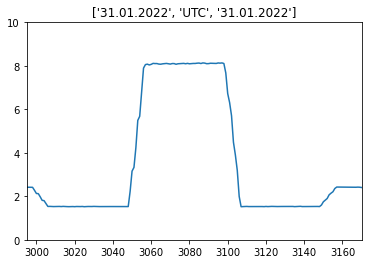

/home/worker/.pyenv/versions/3.8.4/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


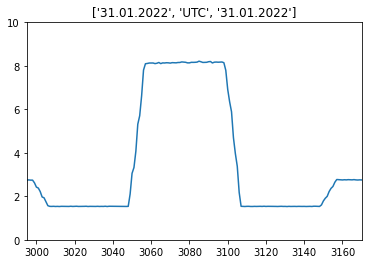

In [285]:
for file in dirr:
    header, data = BSA3_pack.read_pnt(file)
    t_b, t_e = BSA3_pack.get_time_begin_and_end(header)
    sid_t_b = Angle(my_sidereal_time_elin(t_b, DEC_crab), unit='hourangle')
    source_position = int(round(((RA_crab - sid_t_b).arcsecond/15)*float(header['tresolution'][0])*10**-1, 0))
    data_Crab_corr = [[i[module - 1][ray - 1][j] for i in data] for j in range(len(header['fbands']) + 1)]
    dt_list = delays_DM(header, 56.76)
    compens_set = []
    for idx, freq in enumerate(data_Crab_corr[:-1]):
        compens_set.append(np.roll(freq, -int(dt_list[idx]*10)))
        sum_channel = sum(compens_set)
    k = 2*np.pi
    x = np.linspace(k , -k, len(sum_channel))

    b, median = flatter(10, sum_channel)
    amp = max(median)
    shift = 0
    y0 = 0
    plt.clf()
    plt.title(header['date_begin'])
    plt.xlim(2995, 3170)
    plt.ylim(0,10)
    plt.plot(sum_channel)
    plt.show()

In [195]:
data[1][0][0][6] #dot/module/ray/frequency

0.36885992